## 기사 단어뽑기

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re


from konlpy.tag import Twitter
from urllib.request import urlopen
from lxml import html
from collections import Counter

import random
import pytagcloud      # requires Korean font support
import webbrowser

from datetime import datetime, timedelta
import nltk

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
Thema = input("주제를 입력하세요.  ex) society \n")
end_date = input("시작 날짜를 입력하세요.  ex) 20181007 \n")
start_date = input("마지막 날짜를 입력하세요.  ex) 20181115 \n")
choose = input("제목만 가져오려면 : 1\n본문까지 가져오려면 : 2 \n")

end_date = end_date[:4] + '-' + end_date[4:6] + '-' + end_date[6:]
start_date = start_date[:4] + '-' + start_date[4:6] + '-' + start_date[6:]

주제를 입력하세요.  ex) society 
politics
시작 날짜를 입력하세요.  ex) 20181007 
20180101
마지막 날짜를 입력하세요.  ex) 20181115 
20181115
제목만 가져오려면 : 1
본문까지 가져오려면 : 2 
1


In [3]:
if choose == '1':
    word = pd.read_csv('./teample_1_result/hankyure_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')
else:
    word = pd.read_csv('./teample_1_result/hankyure_%s_title_(%s - %s).csv' % (Thema, end_date, start_date), sep=',', encoding='utf-8')

del word['Unnamed: 0']

In [4]:
word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 2 columns):
Title    6251 non-null object
Date     6251 non-null object
dtypes: object(2)
memory usage: 97.8+ KB


In [5]:
# word.head(10)

In [6]:
# word.tail(10)

In [7]:
len(word)

6251

#### DataFrame -> List -> String

In [8]:
words = str()

start = datetime.now()

if choose == '1':
    for i in range(len(list(word['Title']))):
        words += str(list(word['Title'])[i])
else:
    for i in range(len(list(word['News']))):
        words += str(list(word['News'])[i])

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

총 계산 시간: 0:00:01.111064


In [9]:
words[:1000]

'‘노정객’ 마하티르 “북한에 대한 보상 이뤄져야” “심장 터질 듯한 1만5천㎞ 마라톤 ‘통일 희망’으로 견뎠죠”  “의원정수, ‘제헌국회’ 기준 538명, ‘1987’ 기준 372명으로 늘려야” 자유한국당, 전원책 후임으로 금융인 오정근 선임 북한군 비무장지대 감시초소 철거 포착 [더정치] ‘문자해촉’ 전원책, ‘십초고려’ 한국당…둘다 망했다  비행금지구역 동·서해와 한강 하구로 확대 추진 한국·바른미래 보이콧으로 국회 본회의 무산 펜스 만난 문 대통령 “2차 북-미 정상회담으로 비핵화 진전 기대” [포토] 남과 북 GP(감시초소) 철거 현장 공개 “대북 인도주의 지원 막지 말라”…미국서 커지는 우려  박열과 함께한 일본인 여성혁명가 가네코 독립유공자 추서 주한일본대사관 서울서 일본 기업들에 ‘징용판결’ 설명회…“기업활동 보호 우선” 정세현 “미, ‘리비아 방식’ 회귀 우려…중·러·일과 협조해야” 장하성, 고려대 교수로 복귀할 듯  이낙연 총리 “전례답습주의·조직 편의주의 탈피해 규제 과감히 털어내라” 이상민 “소득주도성장 잘못 없지만…사회적 공감대 형성엔 부족” [영상] ‘문자해고’ 전원책의 마지막 한마디 “보수정당 재건 어려워졌다” 당정청 “국정원법 조속 처리…3년 유예 논의한 적 없어” 청와대, 조명래 등 임명 반발에 “7대 배제기준 위배 아니다” 평화당, ‘음주운전’ 이용주에 당원 자격 정지 3개월 징계 전원책 “김병준, 팔 자르는 아픔? 난 그분 수족 아니다” 평화당, ‘음주운전’ 이용주에 당원 자격정지 3개월 결정 민주당, 소속 공직자·당직자 음주운전·채용비리에 ‘무관용 원칙’ 대체복무 교정시설서 36개월 합숙근무 유력 문 대통령, 내년 ‘한-아세안’ 김정은 초청 제안에 “적극 검토” 남북, 사상 첫 항공 협력 당국회담 16일 개성서 한국당 ‘박용진 3법’ 물타기에 조승래 “이럴 시간 법안 일독 끝났다” 임종석 올해 마지막 국회 온 날, 김성태는 매우 비장했다 [뉴스AS] 올빼미 생활 전원책 ‘문자해촉’ 진실은요… 국정원 “북 삭간몰 기지 이미 파

In [10]:
len(words)

191743

#### 트위터

In [11]:
start = datetime.now()

twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

end = datetime.now()
elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:15.219870


#### 단어 분류

In [12]:
one_words = []
two_words = []
etc_words = []

for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        two_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(two_words), len(etc_words)

(7499, 28408, 10483)

In [13]:
one_words = list(set(one_words))
two_words = list(set(two_words))
etc_words = list(set(etc_words))

len(one_words), len(two_words), len(etc_words)

(461, 4724, 2148)

In [14]:
for word in one_words:
    print(word, end='\t')

회	몫	를	승	맛	국	로	상	밸	역	태	엄	곁	온	답	겹	비	네	블	돌	자	푼	탈	의	섬	샷	짐	러	표	뼘	어	롱	맹	염	스	귤	락	좌	걸	욱	생	봇	처	립	요	끝	탓	몽	이	침	탑	듯	현	누	원	향	게	저	윗	숲	권	용	전	부	소	규	쇼	수	백	직	데	율	환	점	밖	낮	호	너	짝	숨	콩	특	공	정	턱	피	폼	곧	파	린	목	은	양	랩	쪽	값	흙	밥	헛	건	복	첫	겁	고	청	댕	땅	월	열	난	석	둘	뿔	선	폭	여	덕	딜	훅	차	꼽	멸	론	던	감	분	바	쾅	쟁	일	량	속	골	뺨	결	갑	협	윤	앞	달	팀	진	새	칼	팬	항	황	모	률	빚	간	책	글	급	채	손	못	별	불	장	촉	총	함	번	연	형	컷	겐	술	매	뭘	밑	폐	경	작	단	칙	둑	람	민	문	병	중	곰	칠	개	뿐	주	댐	것	년	나	팁	등	시	란	끈	약	계	효	창	억	집	사	발	물	과	뼈	논	퇴	길	떼	그	날	축	딸	광	각	통	싹	예	괌	터	록	최	절	앗	또	액	꽃	옷	쑥	롭	확	품	육	킹	늘	션	색	접	북	륭	순	짓	평	눈	겨	획	응	벗	몸	마	친	코	위	적	옥	령	꽉	몇	식	해	끼	혜	배	리	외	뜻	망	보	삶	담	팔	쇄	콸	법	방	겉	구	쏠	군	밤	막	내	초	뒤	휘	면	볼	놈	빛	김	귀	옆	삭	멍	더	송	오	빼	꼭	퍼	찍	금	패	땀	당	설	삥	깨	체	재	격	빈	깜	꿀	쥐	명	키	케	톤	만	산	기	류	투	맨	안	관	잣	버	워	트	말	며	머	빅	뭐	죄	추	넋	반	홍	후	도	때	철	살	냉	넉	융	굴	곡	행	꿈	척	박	쿨	봉	알	화	잡	치	노	룰	운	뻔	잉	영	렵	웃	강	두	낼	남	휙	임	왜	풀	을	포	애	씨	틀	료	울	거	벽	붐	힘	곪	찬	톱	잠	심	무	혹	쌍	세	질	젠	띠	땐	입	움	돈	합	독	인	뭣	꽤	콜	농	좀	댁	끌	묘	드	핵	성	삼	닻	곤	실	종	쌀	낯	유	메	놀	판	층	곳	봄	졸	제	균	범	검	득	객	준	샤	카	조	편	존	견	묵	업	디	택	궁	닌	엘	음	왕	줄	악	펜	

#### stop_words 생성

In [15]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월', '내년']
sw_various = ['알림','소식', '궂긴', '기업', '회장','최대','대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']

stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
stop_words.extend(one_words)

#### stop_words 빼기

In [16]:
nouns = [word for word in nouns3 if word not in stop_words]
len(nouns)

35077

In [17]:
count_cw = Counter(nouns)

In [18]:
count_cw = count_cw.most_common()

In [19]:
common_word = count_cw

In [20]:
wordname = []
wordfreq = []

for i in range(len(common_word)):
    wordname.append(common_word[i][0])
    wordfreq.append(common_word[i][1])
    
    ecolist = pd.DataFrame({'단어명' : wordname, '빈도수':wordfreq})

In [21]:
ecolist.head()

,단어명,빈도수
0,남북,380
1,회담,278
2,김정은,263
3,평화,218
4,홍준표,218


In [22]:
ecolist.to_csv('./teample_1_result/hankyure_%s_commonword_(%s - %s).csv'% (Thema, end_date, start_date), sep=',', encoding='utf-8')

#### 워드클라우드 만들기

In [23]:
token = nltk.Text(nouns, name='기사')
type(token), len(token)

(nltk.text.Text, 35077)

In [24]:
token.vocab().most_common(30)

[('남북', 380),
 ('회담', 278),
 ('김정은', 263),
 ('평화', 218),
 ('홍준표', 218),
 ('국회', 209),
 ('민주당', 209),
 ('평양', 188),
 ('북한', 181),
 ('선언', 179),
 ('자유', 167),
 ('정상회담', 153),
 ('판문점', 138),
 ('합의', 130),
 ('위원장', 128),
 ('안철수', 126),
 ('비핵화', 122),
 ('정상', 110),
 ('김성태', 104),
 ('국민', 104),
 ('정의당', 98),
 ('장관', 94),
 ('선거', 92),
 ('기무사', 92),
 ('노회찬', 92),
 ('문재인', 91),
 ('출마', 90),
 ('한반도', 89),
 ('북미', 89),
 ('대화', 89)]

#### 워드클라우드 한글폰트 설정

In [25]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [26]:
data = token.vocab().most_common(1000)
len(data)

1000

In [27]:
data[:10]

[('남북', 380),
 ('회담', 278),
 ('김정은', 263),
 ('평화', 218),
 ('홍준표', 218),
 ('국회', 209),
 ('민주당', 209),
 ('평양', 188),
 ('북한', 181),
 ('선언', 179)]

#### data를 딕셔너리 형태로 변환

In [28]:
dict_data = dict(data)
len(dict_data)

1000

#### 워드클라우드 그리기

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

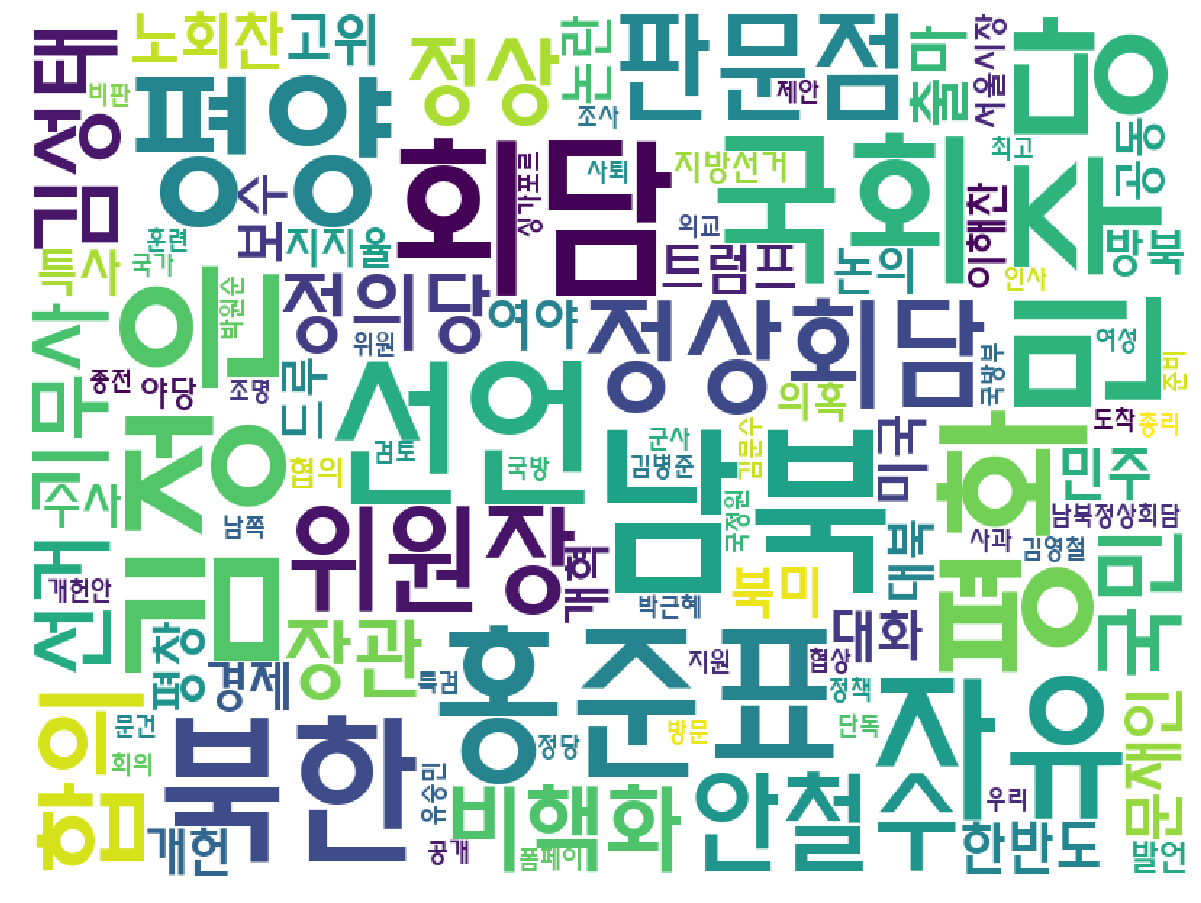

In [30]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

if choose == '1':
    save_img = 'teample_1_result/hankyure_%s_title_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)
else:
    save_img = 'teample_1_result/hankyure_%s_wordcloud_(%s - %s).png' % (Thema, end_date, start_date)

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)